In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.decomposition import PCA
import numpy as np
from yellowbrick.model_selection import validation_curve 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [45]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
bike_df = pd.read_json('logins.json')

In [3]:
bike_df = bike_df.resample('15min', on='login_time').count()

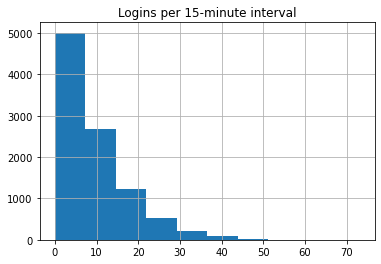

In [4]:
bike_df.hist()
plt.title('Logins per 15-minute interval')
plt.show()

In [5]:
bike_df.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [6]:
bike_df = bike_df.rename(columns={'login_time':'logins'})
bike_df.reset_index(inplace=True)
bike_df.head()

,login_time,logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


<AxesSubplot:title={'center':'Lgoin Count per Day'}>

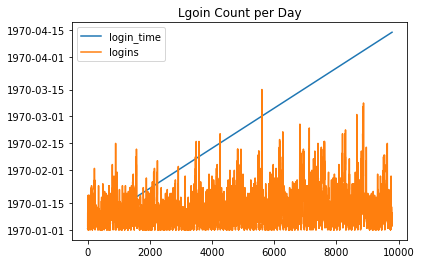

In [7]:
bike_df.plot(title="Lgoin Count per Day")

In [8]:
#let's get the day and month from our dtata using datetime
# capture percent change interval to interval 
bike_df['Day'] = bike_df['login_time'].dt.day_name()
bike_df['percent_change'] = bike_df['logins'].pct_change()*100
bike_df.head()

,login_time,logins,Day,percent_change
0,1970-01-01 20:00:00,2,Thursday,NaN
1,1970-01-01 20:15:00,6,Thursday,200.000000
2,1970-01-01 20:30:00,9,Thursday,50.000000
3,1970-01-01 20:45:00,7,Thursday,-22.222222
4,1970-01-01 21:00:00,1,Thursday,-85.714286


<AxesSubplot:>

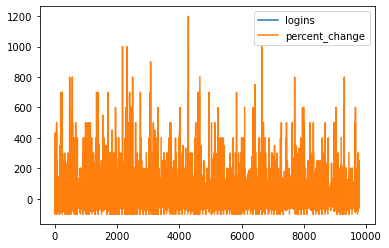

In [9]:
percent_change = bike_df[['logins', 'percent_change']]
percent_change.plot()

C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


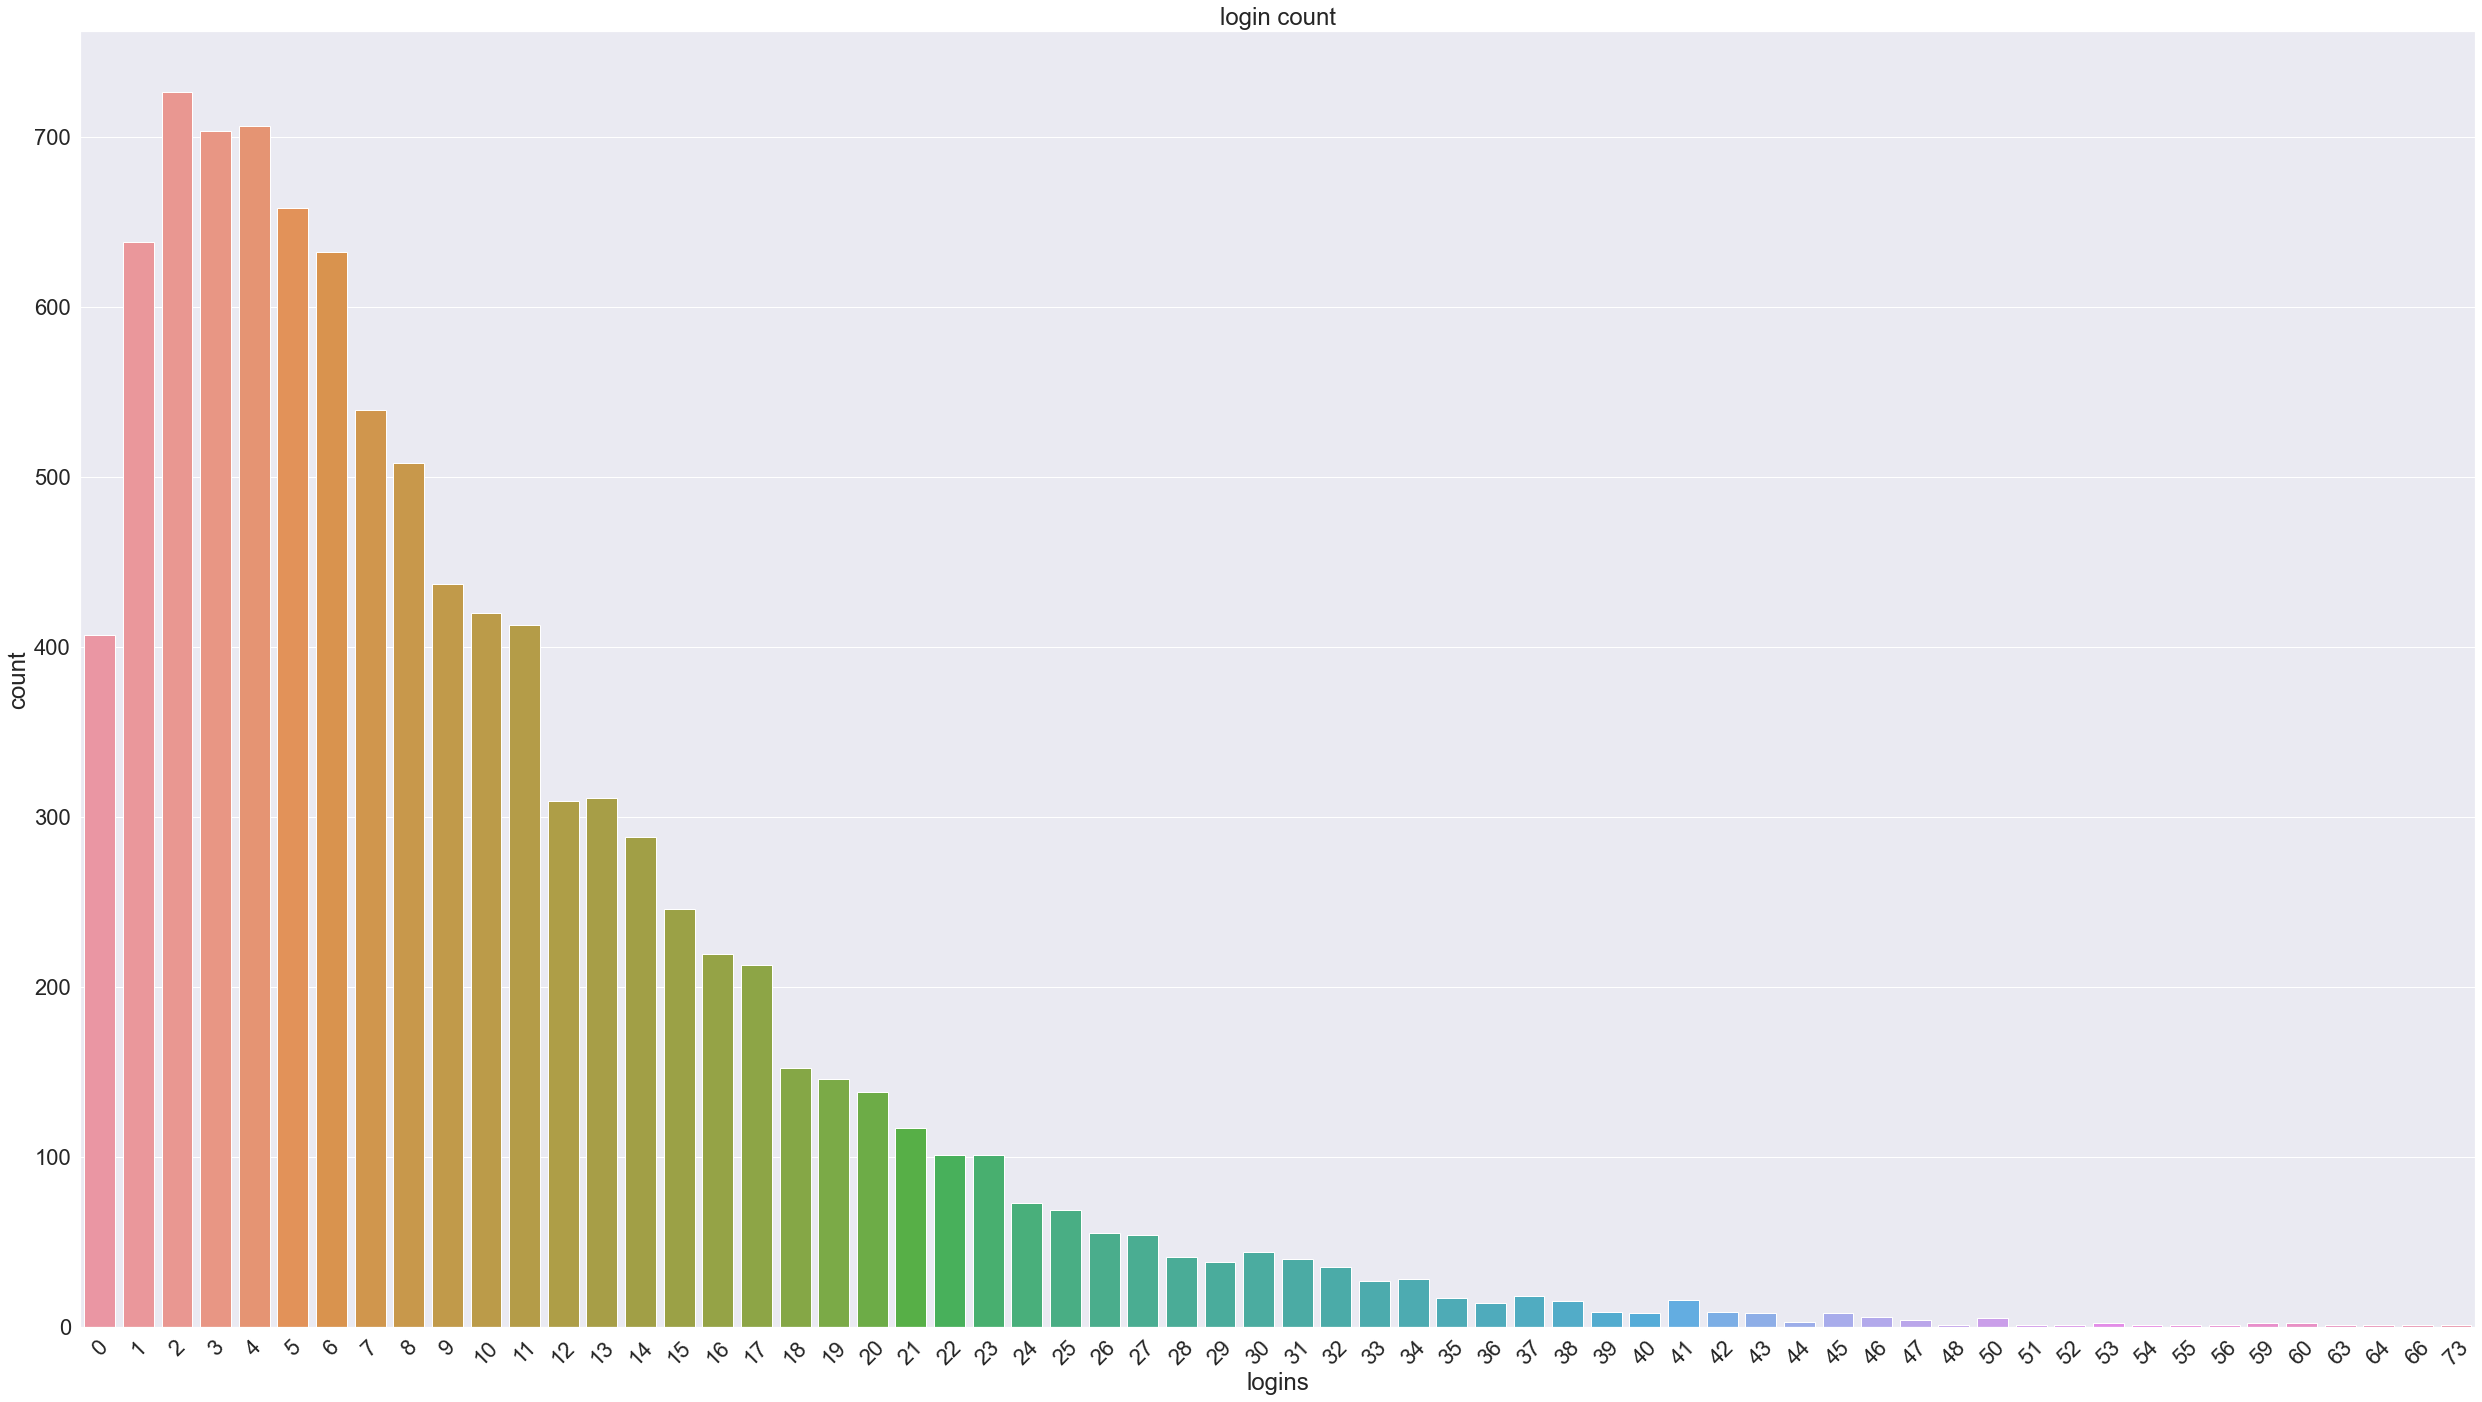

In [10]:
plt.figure(figsize=(35,20))
sns.set(font_scale = 2)
sns.countplot(bike_df['logins'])
plt.title('login count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
print(bike_df['logins'].quantile(0.25))
print(bike_df['logins'].quantile(0.5))
print(bike_df['logins'].quantile(0.75))
print(bike_df['logins'].quantile(0.9))
print(len(bike_df))

3.0
7.0
13.0
20.30000000000109
9788


## The most common amount of logins over all observed 15-minute intervalswas was 2 closely 4 and 3.  75% of all counts lie at or below 13. The tail skews to the right significantly. 

In [12]:
high_counts = [51, 52, 53, 54, 55, 56, 59, 60, 63, 64, 66, 73]
high_countdf=bike_df[bike_df['logins'].isin(high_counts)]
print(len(high_countdf))
high_countdf.head(15)

15


,login_time,logins,Day,percent_change
5602,1970-03-01 04:30:00,73,Sunday,78.048780
6275,1970-03-08 04:45:00,51,Sunday,18.604651
6825,1970-03-13 22:15:00,55,Friday,34.146341
7126,1970-03-17 01:30:00,53,Tuesday,82.758621
8291,1970-03-29 04:45:00,52,Sunday,18.181818
8654,1970-04-01 23:30:00,60,Wednesday,114.285714
8850,1970-04-04 00:30:00,53,Saturday,35.897436
8852,1970-04-04 01:00:00,54,Saturday,8.000000
8853,1970-04-04 01:15:00,63,Saturday,16.666667
8854,1970-04-04 01:30:00,64,Saturday,1.587302


## Looks like a significant majority of high counts happened on the weekends, not surprising giving that the weekend is the da

### Let's add Day/Night to our dataset  since it looks like that may be relevant in part 2.

In [13]:
day_night = lambda x: "Day" if x in range(6,19) else "Night"
bike_df['hour'] = bike_df['login_time'].dt.hour
bike_df['day/night'] = bike_df['hour'].apply(day_night)
bike_df.head()

,login_time,logins,Day,percent_change,hour,day/night
0,1970-01-01 20:00:00,2,Thursday,NaN,20,Night
1,1970-01-01 20:15:00,6,Thursday,200.000000,20,Night
2,1970-01-01 20:30:00,9,Thursday,50.000000,20,Night
3,1970-01-01 20:45:00,7,Thursday,-22.222222,20,Night
4,1970-01-01 21:00:00,1,Thursday,-85.714286,21,Night


In [14]:
for i in range(6,19):
    print(i)

6
7
8
9
10
11
12
13
14
15
16
17
18


C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


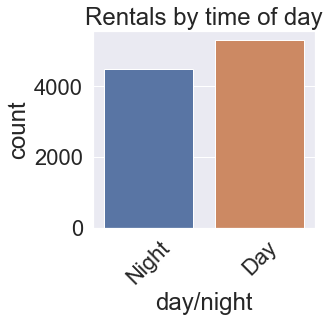

In [15]:
plt.figure(figsize=(5,5))
sns.set(font_scale = 2)
sns.countplot(bike_df['day/night'])
plt.title('Rentals by time of day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

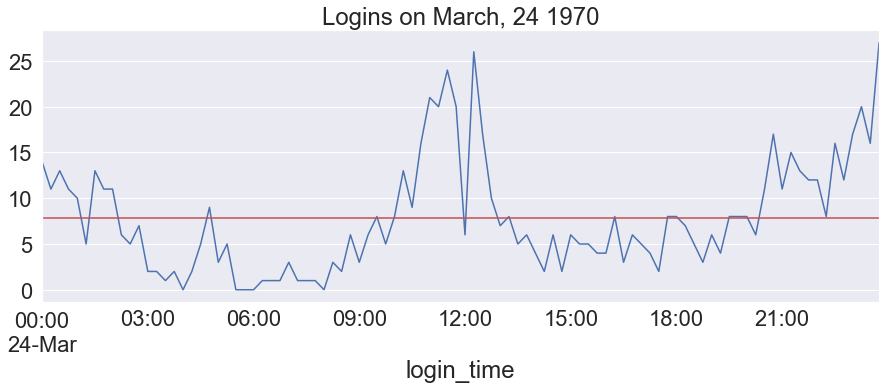

In [16]:
#Let's look at a 3-day span to see any trends throughout the day: 
login_index = bike_df.set_index('login_time')
subset = login_index.loc['1970-03-24']
subset_mean = subset['logins'].mean()
subset['logins'].plot(figsize=(15,5), title='Logins on March, 24 1970');
plt.axhline(y=subset_mean, color='r', linestyle='-')

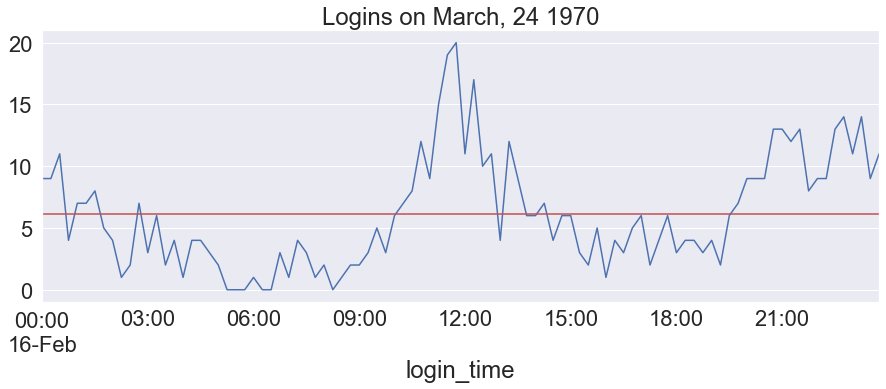

In [17]:
subset2 = login_index.loc['1970-02-16']
subset_mean2 = subset2['logins'].mean()
subset2['logins'].plot(figsize=(15,5), title='Logins on March, 24 1970');
plt.axhline(y=subset_mean2, color='r', linestyle='-')

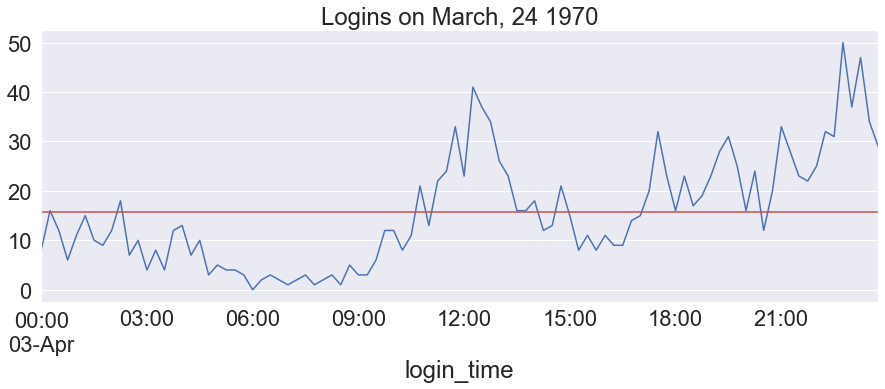

In [18]:
subset3 = login_index.loc['1970-04-03']
subset_mean3 = subset3['logins'].mean()
subset3['logins'].plot(figsize=(15,5), title='Logins on March, 24 1970');
plt.axhline(y=subset_mean3, color='r', linestyle='-')

In [19]:
print(login_index.loc['1970-04-03'].head(1))
print(login_index.loc['1970-02-16'].head(1))
print(login_index.loc['1970-03-24'].head(1))

            logins     Day  percent_change  hour day/night
login_time                                                
1970-04-03       8  Friday      -42.857143     0     Night
            logins     Day  percent_change  hour day/night
login_time                                                
1970-02-16       9  Monday      -35.714286     0     Night
            logins      Day  percent_change  hour day/night
login_time                                                 
1970-03-24      14  Tuesday            75.0     0     Night


### There appears to be seaonsality at the day level with logins, beginning at midnight, hovering sighlty above or at the day's mean before dropping to sliglty above zero logins up unitl abou t 9am when we see a huge spike around noon, the post noon spike leads to more hovering around the daily mean and the day ends with a spike that begins either in mid-afternoon or late evening(8/9pm). 

In [20]:
login_index.head()

,logins,Day,percent_change,hour,day/night
login_time,,,,,
1970-01-01 20:00:00,2,Thursday,NaN,20,Night
1970-01-01 20:15:00,6,Thursday,200.000000,20,Night
1970-01-01 20:30:00,9,Thursday,50.000000,20,Night
1970-01-01 20:45:00,7,Thursday,-22.222222,20,Night
1970-01-01 21:00:00,1,Thursday,-85.714286,21,Night


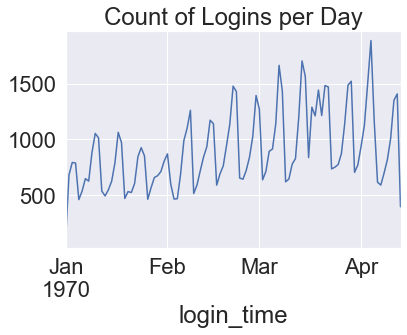

In [21]:
### Let's view monthly trends 
#resample daily, summing up each day's ridership
df_daily = login_index.resample('D').sum()
df_daily['logins'].plot(title='Count of Logins per Day');

### We also see a clear increase as we move into the the warmer months 

In [22]:
day=login_index.groupby(['hour', 'Day']).mean()


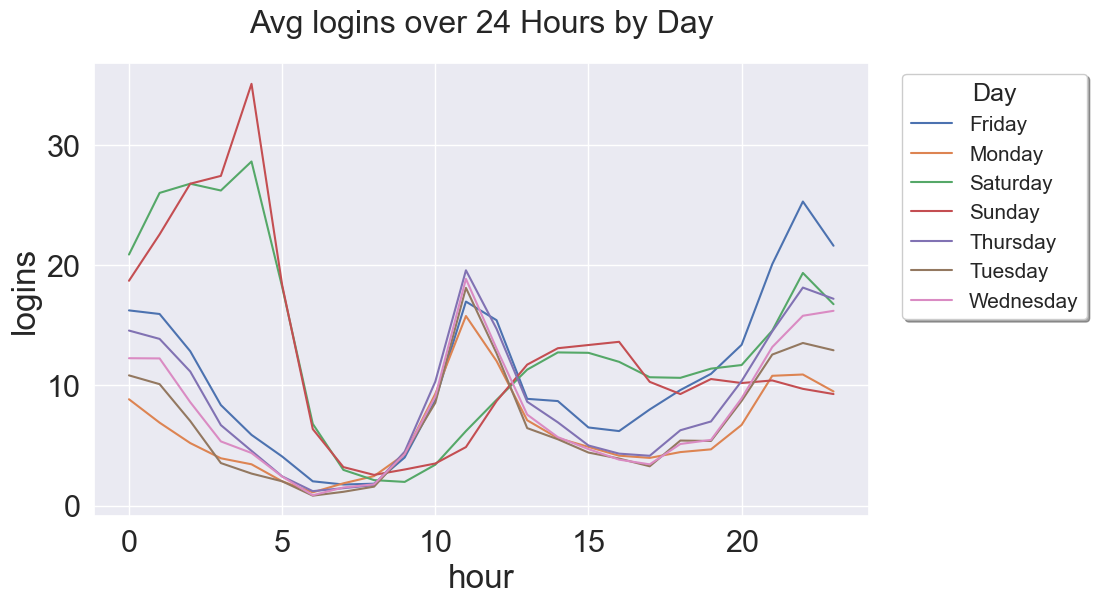

In [23]:
fig, line = plt.subplots(figsize = (10,6), dpi = 100)
scatter = sns.lineplot(x = "hour", y ="logins", data=day, hue='Day' )
scatter.set_title('Avg logins over 24 Hours by Day', fontsize = 23, y =1.05);
scatter.legend(fontsize = 15, \
               bbox_to_anchor= (1.03, 1), \
               title="Day", \
               title_fontsize = 18, \
               shadow = True, \
               facecolor = 'white')
plt.show()

### This is cofnfirms what we suspected earlier: That the weekends are the busiest/ have the most amount of logins. 
### Interstingly there seems to be tjree main trends: 1-SAT/SUN trend 2-FRI trend 3-MON through THU trend

# PART 2

## 1: 
### I would select mean difference between time spent working in each city. The reason for selecting this a the key measure of sucess is that it is the objective of the toll policy to encourage driver partners to be available in both cities, and this measurely tracks the reality of time spent in both cities with greater fidelity than any other measure I can think of. 

### This mean difference is preferable becuase it does not to appear to have any inherit bias between drivers whose driving predominately occurs in either city/time of day. A driver can still favor their preferred city/time of day while at the same time extending time spent in the other city since they have the toll being paid for.  (Not if the drivers are privy to the fact that the this toll reimbursement is to incentivize inter-city travel, though perhaps this would be obvious to them.)


## 2:
### I would perform an two-tailed test. Experiment group would have the toll reimbursment and the control group would not. The desire for inter-city travel would be expressed to the drivers. 

### Crusially we would want the both the control & experiment groups to randomly pulled from the set of all Ultimate driver partners. To this end we would have premliminary observation period before the splitting into A/B and encouragement for inter-city travel. The prelimnary observation would capure a driver's typical behavior/pattern and we would then categorize drivers according to important attributes: hoursworked per day (further analyzed by day day of week), time spent in each city, frequency of crossing toll, time spent in each city, time of day spent drving, number of rides, distance of rides. Control and experiment when compared to eachother should have a similar amount of drivers that fit the mentioned attributes so that control & experiment are representative of eachother. This is all assuming that the driver fleet is large enough to create a normal distribution. 

### Statestical Tests: We would want to establish some mean difference range that would be preferrable, a model for our drivers to ambition for. A confidence interval would be selected in accordance to our sample size and significance level would be selected. Compute t statstic of measure of success between driver populations. Then compute p-value to determine if null is rejected or not. 

### Null Hypothesis: "The new toll policy has no effect on the porportionality of time spent between cities. Alternative is that the new toll policy does effect proportionality. 

### If null is rejected we should determine if there are certain drivers who fit certain attributes that we measured earlier whose proportionality is more likely to affected in our desired way by the new toll policy. Perhaps we recommend to Ultimate that only those specific drivers be approved for toll reimbursal. 

### Q3. Part 1

In [24]:
df = pd.read_json('ultimate_data_challenge.json', convert_dates=['signup_date', 'last_trip_date'])
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [25]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [26]:
#check for nulls
df.info()
#Looks like there a lot of values missing for avg_rating_of_driver and some missing avg_rating by_driver and phone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [27]:
#drop all rows w/ missing phone value
df = df[pd.notnull(df['phone'])]
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8026
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       198
dtype: int64

In [28]:
# the other missing values will be filled w/ median. this is chosen becuase we don't want extreme outliers to throw off 
# our model. Though I acknowledge that filling in so many nulls in the avg_rating_of_driver is not very preferable. 
# an alternative is to fill in that row with some type of random sampling from the distribution of values that we do have 
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median()) #impute with median
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median()) 

In [29]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [30]:
#convert ultimate_black_user to binary, can use multiply by 1 becuase column is bool  
df['ultimate_black_user'] = df['ultimate_black_user']*1
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9


In [31]:
#driver is to be considered retained if they used w/in preceding 30 dyas. we most recent date with max()
# and capture all that were retained using greater than statement
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [32]:

df['retained'] = (df['last_trip_date'] >= pd.to_datetime('2014-06-01'))*1

In [33]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0


In [34]:
print(round(len(df[df['retained'] == 1])/len(df)*100,2), '% retained')

37.64 % retained


### Part 2

In [35]:
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                int32
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
retained                           int32
dtype: object

In [36]:
df=df.drop(columns=['signup_date', 'last_trip_date'])
df['retained']=df['retained'].astype(np.int64)
df['ultimate_black_user']=df['ultimate_black_user'].astype(np.int64)

In [37]:
df.dtypes

city                       object
trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
phone                      object
surge_pct                 float64
ultimate_black_user         int64
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
retained                    int64
dtype: object

In [38]:
#code adapted from originaly written by Jason Beownlee
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper

def encode_categorical_cols(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns
    numerical_columns = dataframe.select_dtypes(include=['float64', 'int64', 'int32']).columns

    mapping = []
    mapping += ((col, LabelEncoder()) for col in categorical_columns)
    mapping += ((col, None) for col in numerical_columns)
        
    mapper = DataFrameMapper(mapping, df_out=True)
    
    stages = []
    stages += [("pre_processing_mapper", mapper)]
    
    pipeline = Pipeline(stages)
    transformed_df = pipeline.fit_transform(dataframe)
    return transformed_df

In [39]:
encoded_data = encode_categorical_cols(df)
encoded_data.dtypes

city                        int32
phone                       int32
trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user         int64
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
retained                    int64
dtype: object

In [40]:
encoded_data.head()

,city,phone,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,1,1,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1
1,0,0,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0
2,0,1,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0
3,1,1,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1
4,2,0,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0


In [49]:
y = encoded_data['retained']
X = encoded_data.drop(columns = ['retained'])

C:\Users\Gabe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gabe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gabe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "C:\Users\Gabe\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Gabe\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\Gabe\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 802, in check_X_y
    estimator=estimator)
  File "C:\Users\Gabe\anaconda3\lib\site-packages\sklea

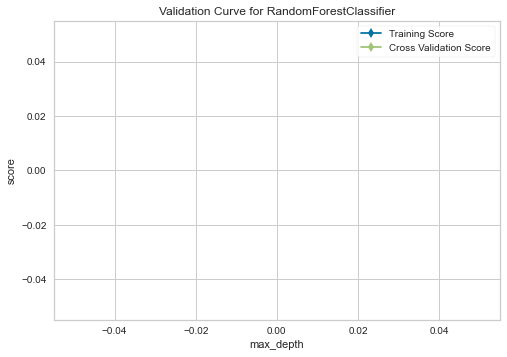

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=5,
                estimator=RandomForestClassifier(n_estimators=800,
                                                 random_state=191),
                param_name='max_depth', param_range=array([ 5,  8, 15, 25, 30]),
                scoring='accuracy')


In [50]:
rf = RandomForestClassifier(random_state=191, n_estimators = 800, min_samples_split=2, min_samples_leaf=1)

print(validation_curve(rf, #from below borrwing optimal params 
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = max_depth , cv = 5, scoring='accuracy'))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 191, shuffle=True)

In [52]:
## Establish exhaustive gri search 
# https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

forest = RandomForestClassifier(random_state = 191)

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = None, verbose = 2, 
                      n_jobs = -1) #None to use default 5-fold cross validation 
bestF = gridF.fit(X_train, y_train)

print(bestF.best_params_, bestF.best_score_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 68.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 120.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 194.7min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 260.6min finished


{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 300} 0.7839563471192772


In [55]:
forestOpt = RandomForestClassifier(random_state = 191, max_depth = 15,     
n_estimators = 300, min_samples_split = 15, min_samples_leaf = 5)

modelOpt = forestOpt.fit(X_train, y_train)
y_pred = forestOpt.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [68]:
#Calculating Confusion Matrix
Confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', Confusion_matrix)
#https://stackoverflow.com/questions/20927368/how-to-normalize-a-confusion-matrix
cm = Confusion_matrix.astype('float') / Confusion_matrix.sum(axis=1)[:, np.newaxis]
print(cm)

#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
Accuracy_score = accuracy_score(y_test, y_pred)
print('Accuracy Score is : ', Accuracy_score)


#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))  
Recall_score = recall_score(y_test, y_pred, average = 'micro')
print('Recall Score is : ', Recall_score)


#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
Precision_score = precision_score(y_test, y_pred, average = 'micro') 
print('Precision Score is : ', Precision_score)

#Calculating F1_Score: # (TP / (TP + 1/2(FP + FN))
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1_score is : ', f1)

Confusion Matrix is : 
 [[8851 1342]
 [2201 3976]]
[[0.86834102 0.13165898]
 [0.35632184 0.64367816]]
Accuracy Score is :  0.7835675015271839
Recall Score is :  0.7835675015271839
Precision Score is :  0.7835675015271839
F1_score is :  0.7798562144810913


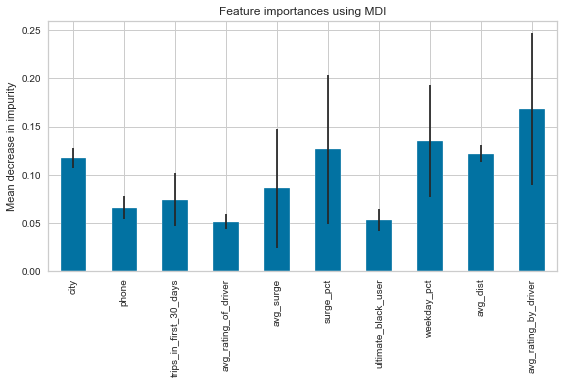

In [82]:
#Feature Importance:
### https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_importance = forestOpt.feature_importances_
features = X.columns
indices = np.argsort(feature_importance)
std = np.std([
    tree.feature_importances_ for tree in forestOpt.estimators_], axis=0)
forest_importances = pd.Series(feature_importance, index=features)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Model performanc seems to be pretty good. Ideally we would want to compare other models like XGBoosta  and KNN to see if they could produce improved scores.Due to time and computing limitations we settled for this first model. Any future modeling should definitely aim improve upon our False negative rate (the % at which we incorrectly predict that a customer will not not be retained out of all customers predicted not retained.

### Also in future modeling could preform PCA plots and correlation heat mapping. Depending on results features could be trimmed down/or given less weight. Additionally, categorical (city & phone) variables could be one hot coded, thsi wouldn't be too costly since there are only 5 categories amongst them. 

## PART 3

### As we can see above our top 5 categories (the only five features whose mean increase in impurity is above .10) appear to have the most influence on the model's decision on our target variable. 

### First I'd run focus groups with our drivers, one focus group would have only high rated drivers and we'd try to determine what exaclty those drivers are doing that may leaw/d to increased retention. A focus group would be run with poor rating drivers and we would try to determine what they are doing that may hinder retention. 

### Second, it appears that users who use on weekdays ore often are more ikley to be retained. Determine ride destonation pf the people going that only use it on the weekends? Figure out why don't they translate occasional weekend use to regular weekday use? Dtermine if weekend drivers may not be sober? Figure out ways to make appealing weekday-use benefits.

### It appears the more lilkely a user will ride during surge times the more likely the user will be retained.  Perhaps we have an internal dialoufue to see whther it would be feasible to occasionally offer users likely to not be reatained a surge fee mutliplier waiver. 